<a href="https://colab.research.google.com/github/Mohit501/Deep-Learning-with-Keras/blob/main/Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Required Libraries**

In [1]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,SimpleRNN
from keras.utils import to_categorical,plot_model
from keras.datasets import mnist

## **Loading Data**

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# **Pre-Processing**

**Computing number of labels**

In [3]:
num_labels = len(np.unique(y_train))

**Converting to one-hot vector**

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Image Dimensions**

In [5]:
image_size = x_train.shape[1]

**Resize and Normalize**

In [6]:
x_train = np.reshape(x_train,[-1,image_size,image_size])
x_train = x_train.astype('float32')/255.0
x_test = np.reshape(x_test,[-1,image_size,image_size])
x_test = x_test.astype('float32')/255.0

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

# **Recurrent Neural Network**

In [9]:
model = Sequential()
model.add(SimpleRNN(units=256,dropout = 0.2,input_shape = (image_size,image_size)))
model.add(Dense(num_labels,activation='softmax'))

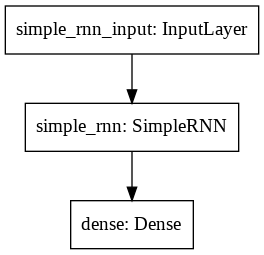

In [10]:
plot_model(model)

In [11]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [12]:
model.fit(x_train,y_train,batch_size=128,epochs=10)

Epoch 1/10
469/469 [==============================] - 30s 61ms/step - loss: 0.6281 - accuracy: 0.8032
Epoch 2/10
469/469 [==============================] - 29s 61ms/step - loss: 0.2078 - accuracy: 0.9382
Epoch 3/10
469/469 [==============================] - 28s 61ms/step - loss: 0.1622 - accuracy: 0.9529
Epoch 4/10
469/469 [==============================] - 28s 61ms/step - loss: 0.1472 - accuracy: 0.9571
Epoch 5/10
469/469 [==============================] - 29s 61ms/step - loss: 0.1291 - accuracy: 0.9612
Epoch 6/10
469/469 [==============================] - 28s 60ms/step - loss: 0.1352 - accuracy: 0.9601
Epoch 7/10
469/469 [==============================] - 28s 61ms/step - loss: 0.1184 - accuracy: 0.9647
Epoch 8/10
469/469 [==============================] - 28s 61ms/step - loss: 0.1162 - accuracy: 0.9660
Epoch 9/10
469/469 [==============================] - 28s 60ms/step - loss: 0.1082 - accuracy: 0.9682
Epoch 10/10
469/469 [==============================] - 29s 61ms/step - loss: 0.101

In [13]:
loss,acc = model.evaluate(x_test,y_test,batch_size = 128)

79/79 [==============================] - 3s 33ms/step - loss: 0.0769 - accuracy: 0.9769


In [14]:
print(" Model loss on test data is:",loss)

 Model loss on test data is: 0.07689759135246277


In [ ]:
print("Accuracy on test data is:",acc*100)